## 파이토치
- 페이스북 주도로 여러 회사와 대학이 합심해 개발한 오픈소스 프로젝트
- 2016sus 8dnjf cjt rhdro

### 텐서플로 vs 파이토치
#### 텐서플로
- 그래프를 미리 정해두고 실행중에는 바꿀 수 없음 (정적 계산 그래프 static computational graph) 방식
- 정적 계산 그래프 방식은 그래프 계산 방식을 최초에 정해두기 때문에 최적화하기가 쉬움
- 정적인 데이터셋 학습 및 정적인 모델 배포 -> 오프라인 학습(offline learning)

#### 파이토치
- 동적 계산 그래프 방식 (dynamic computational graph)
- 데이터에 대해 유연한 모델을 만들 수 있음
- 자율주행차, 게임, 인터넷 등 쌓이는 데이터에 대한 실시간 대응하는 동적인 학습 방법이 중요해질 전망

### 파이토치 라이브러리
- Torchvision : 각종 비전 및 데이터 관리용 도구
- TorchText : 각종 텍스트 데이터셋 및 데이터 관리용 도구
- Ignite : 학습용 코드 프로토타이핑 도움


## 텐서의 모양과 차원 조절하기
- 텐서의 원소수는 유지하되 모양과 차원을 조절
- squeeze(), unsqueeze(), view()

In [11]:
import torch

x = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(x, x.size(), x.shape, x.ndimension())

# 랭크 늘리기
x = torch.unsqueeze(x,0)
print('랭크늘리기\n', x, x.size(), x.shape, x.ndimension())

# 텐서 줄이기
x = torch.squeeze(x)
print('랭크줄이기\n', x, x.size(), x.shape, x.ndimension())

# view 함수 = reahpe역할
x = x.view([3,4])
print('view(reshape)\n', x, x.size(), x.shape, x.ndimension())


tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]) torch.Size([4, 3]) torch.Size([4, 3]) 2
랭크늘리기
 tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]]]) torch.Size([1, 4, 3]) torch.Size([1, 4, 3]) 3
랭크줄이기
 tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]) torch.Size([4, 3]) torch.Size([4, 3]) 2
view(reshape)
 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]) torch.Size([3, 4]) torch.Size([3, 4]) 2


## 텐서이용한 행렬 연산곱

In [24]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0], [3.0,4.0], [5.0,6.0]]) # 3,2
print('w\n', w,'\n x \n', x)

b = torch.randint(-3,3, (5,2))
print('b\n', b)

wx = torch.mm(w,x)
print('wx\n', wx)

result = wx+b
print('result\n', result)

w
 tensor([[-0.8602,  1.1545,  0.1148],
        [ 0.8398,  0.6378,  1.0651],
        [ 0.1994,  1.4738,  0.6711],
        [ 0.8544, -0.7784, -0.4436],
        [ 0.2046,  0.9793,  1.8845]]) 
 x 
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
b
 tensor([[-3,  1],
        [-2, -3],
        [ 0,  0],
        [-3, -1],
        [-1, -1]])
wx
 tensor([[ 3.1772,  3.5863],
        [ 8.0787, 10.6215],
        [ 7.9763, 10.3206],
        [-3.6988, -4.0664],
        [12.5650, 15.6334]])
result
 tensor([[ 0.1772,  4.5863],
        [ 6.0787,  7.6215],
        [ 7.9763, 10.3206],
        [-6.6988, -5.0664],
        [11.5650, 14.6334]])


## AutoGrad
- 경사하강법 : 오차를 수학 함수로 표현 한 후 미분하여 이 함수의 기울기를 구해 오차의 최소ㄳ값이 있는 방향을 찾아내는 알고리즘
- autograd : 미분 계산을 자동화 된 것 
- 수식을 w에 대해 미분하여 기울기를 계산 w의 requires_grad = True로 설정
- backward() 함수 호출시, w.grad는 w가 속한 수식을 w로 미분한 값을 반환

In [38]:
w = torch.tensor([2.0], requires_grad = True)
print('기본 tensor', w)

a = 2*(w**2) + 2*w + 7 # 2w^2 + 2w + 7 
print(a)

a.backward() # ==> 4w + 2 
print('w로 미분한 값(a)은 {}'.format(w.grad))

기본 tensor tensor([2.], requires_grad=True)
tensor([19.], grad_fn=<AddBackward0>)
w로 미분한 값(a)은 tensor([10.])


## 경사하강법 구현

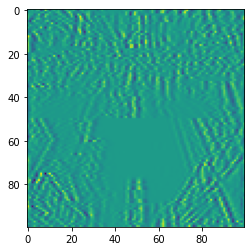

In [12]:
import torch
import pickle
import matplotlib.pyplot as plot

# 오염시키는 함수
def weird_function(x, n_iter=5):
    h=x
    filt = torch.tensor([-1.3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_i = torch.cat((zero_tensor, h[:-1]), 0) # concatenate 함수
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2]*h_i + filt[1] * h_r
        if i%2==0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

# 오차 계산 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

# 오염된 image 로드
broken_image = torch.FloatTensor(pickle.load(open('data/broken_image_t.p', 'rb'), encoding='latin1'))
plot.imshow(broken_image.view(100,100))

tensor([-0.2122, -1.2018, -0.3904,  ..., -0.4920,  0.9882,  0.0771]) torch.Size([10000]) torch.Size([10000])
Loss at 0 = 519.5779418945312
Loss at 1000 = 20.03652000427246
Loss at 2000 = 20.038219451904297
Loss at 3000 = 20.038251876831055
Loss at 4000 = 20.038143157958984
Loss at 5000 = 20.037282943725586
Loss at 6000 = 20.0367431640625
Loss at 7000 = 20.033203125
Loss at 8000 = 20.027727127075195
Loss at 9000 = 20.02872657775879
Loss at 10000 = 20.02713394165039
Loss at 11000 = 20.025957107543945
Loss at 12000 = 20.019420623779297
Loss at 13000 = 20.00830841064453
Loss at 14000 = 20.00149917602539
Loss at 15000 = 19.997406005859375
Loss at 16000 = 20.003232955932617
Loss at 17000 = 19.998579025268555
Loss at 18000 = 19.99261474609375
Loss at 19000 = 19.990880966186523


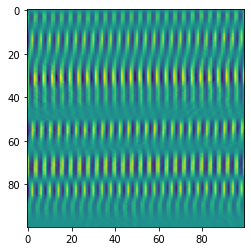

In [11]:
# 무작위 텐서 생성과 학습률 설정
random_tensor = torch.randn(10000, dtype=torch.float)
lr = 0.8
print(random_tensor, random_tensor.shape, random_tensor.size())

# 경사하강법
for i in range(20000):
     # 오차함수를 random_tensor로 미분해야 함 (미분 변수로 등록)
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor) # 랜덤으로 오염시키고
    
    ## loss 현재 이미지의 loss 구하기
    loss = distance_loss(hypothesis, broken_image)
    loss.backward() # loss 에 대해서 연산진행
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad # 
    
    if i%1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))
        
## 복원된 이미지 시각화
plot.imshow(random_tensor.view(100,100).data)